In [1]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the dataset
dataset = pd.read_csv('C:/users/acer/desktop/python/vgsales.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
dataset.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
# Checking for null values in the dataset
dataset.isnull().values.any()

True

In [6]:
## Checking which columns contain null values
print(dataset['Rank'].isnull().values.any())
print(dataset['Name'].isnull().values.any())
print(dataset['Platform'].isnull().values.any())
print(dataset['Year'].isnull().values.any())
print(dataset['Genre'].isnull().values.any())
print(dataset['Publisher'].isnull().values.any())
print(dataset['NA_Sales'].isnull().values.any())
print(dataset['EU_Sales'].isnull().values.any())
print(dataset['JP_Sales'].isnull().values.any())
print(dataset['Other_Sales'].isnull().values.any())
print(dataset['Global_Sales'].isnull().values.any())

False
False
False
True
False
True
False
False
False
False
False


In [7]:
#Checking the number of missing value rows in the dataset
print(dataset['Year'].isnull().sum())
print(dataset['Publisher'].isnull().sum())

271
58


In [8]:
# Removing the missing value rows in the dataset
dataset = dataset.dropna(axis=0, subset=['Year','Publisher'])

In [9]:
dataset.isnull().values.any()

False

In [10]:
## Defining the features and the dependent variable
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(x[0])
print(y)

['Wii Sports' 'Wii' 2006.0 'Sports' 'Nintendo' 41.49 29.02 3.77 8.46]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


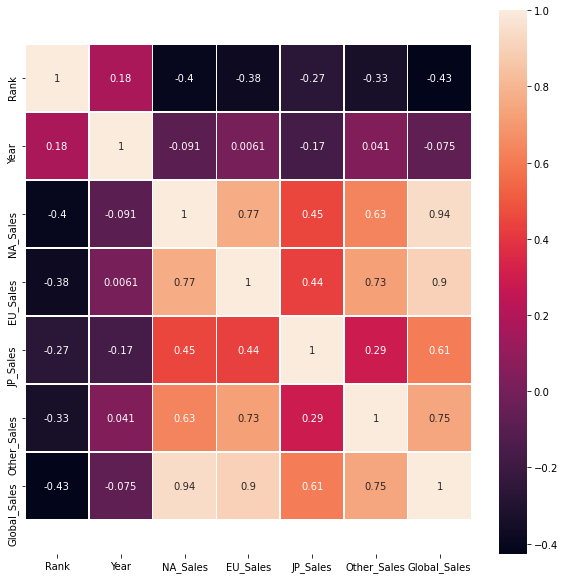

In [11]:
## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

In [12]:
# Retaining only the useful features of the dataset
# From the heatmap, we can decipher that the columns NA_Sales,JP_Sales,EU_Sales and Other_Sales are the most useful features
# in determining the global sales
x = dataset.iloc[:,6:-1].values
print(x[0])

[41.49 29.02  3.77  8.46]


In [13]:
## Splitting the dataset into independent and dependent vaiables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.01 0.   0.   0.  ]
 [0.05 0.04 0.   0.01]
 [0.44 0.02 0.   0.04]
 ...
 [0.1  0.01 0.   0.01]
 [0.06 0.02 0.   0.01]
 [0.67 0.01 0.   0.06]]
[[0.1  0.07 0.   0.01]
 [0.   0.   0.19 0.  ]
 [0.02 0.01 0.   0.  ]
 ...
 [0.15 0.   0.   0.01]
 [0.   0.   0.12 0.  ]
 [0.   0.   0.3  0.  ]]
[0.01 0.09 0.49 ... 0.11 0.09 0.74]
[0.19 0.19 0.02 ... 0.16 0.12 0.3 ]


---

### Multiple Linear Regression

In [15]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression()

In [16]:
## Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [17]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.9999863067614225


----

### Polynomial Regression

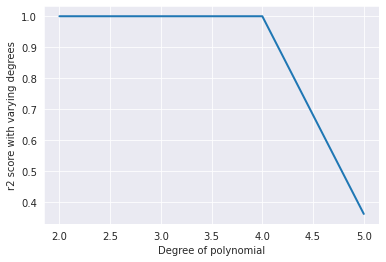

In [18]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [19]:
## Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9999862983602374


---

### K-Nearest Neighbors Regression

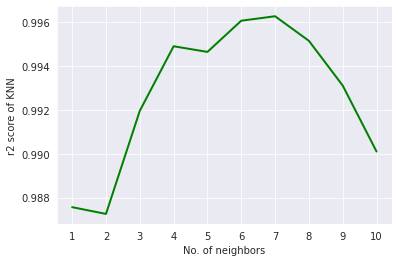

In [20]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()    

In [21]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=7)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.9962856779674387


---

### Decision Tree Regression

In [22]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [24]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.9557430279189166


---

### Random Forest Regression

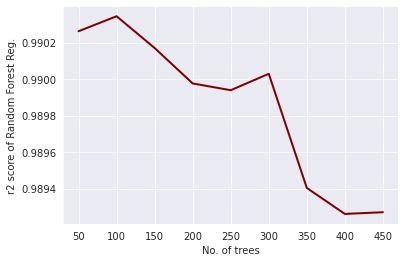

In [25]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()    

In [26]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)

0.9903442928856757


---

In [27]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [28]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

[[-0.30955728 -0.28390883 -0.24821835 -0.24641218]
 [-0.2609813  -0.20724683 -0.24821835 -0.19583265]
 [ 0.21263455 -0.24557783 -0.24821835 -0.04409408]
 ...
 [-0.20026132 -0.26474333 -0.24821835 -0.19583265]
 [-0.2488373  -0.24557783 -0.24821835 -0.19583265]
 [ 0.49194647 -0.26474333 -0.24821835  0.05706498]]
[[-0.20026132 -0.14975033 -0.24821835 -0.19583265]
 [-0.32170128 -0.28390883  0.34373605 -0.24641218]
 [-0.29741329 -0.26474333 -0.24821835 -0.24641218]
 ...
 [-0.13954134 -0.28390883 -0.24821835 -0.19583265]
 [-0.32170128 -0.28390883  0.12564759 -0.24641218]
 [-0.32170128 -0.28390883  0.6864465  -0.24641218]]
[[-0.21994512]
 [-0.21994512]
 [-0.32626397]
 ...
 [-0.23870727]
 [-0.26372347]
 [-0.15115057]]
[[-0.33251802]
 [-0.28248562]
 [-0.03232363]
 ...
 [-0.26997752]
 [-0.28248562]
 [ 0.12402762]]


### Linear Support Vector Regression

In [29]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [30]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [31]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.9915019792741975


---

### Non-linear Support Vector Regression

In [32]:
## Training the Non-linear SVR model on the training set
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

SVR()

In [33]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [34]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.7434575740491709


---

In [35]:
## Applying XGBoost Regression model on the training set
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
## Predicting test results
y_pred = regressor_xgb.predict(x_test)

In [37]:
## Calculating r2 score
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

0.9848147845937684


---

In [38]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR,r2_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[99.999, 99.999, 99.629, 95.574, 99.034, 99.15, 74.346, 98.481]


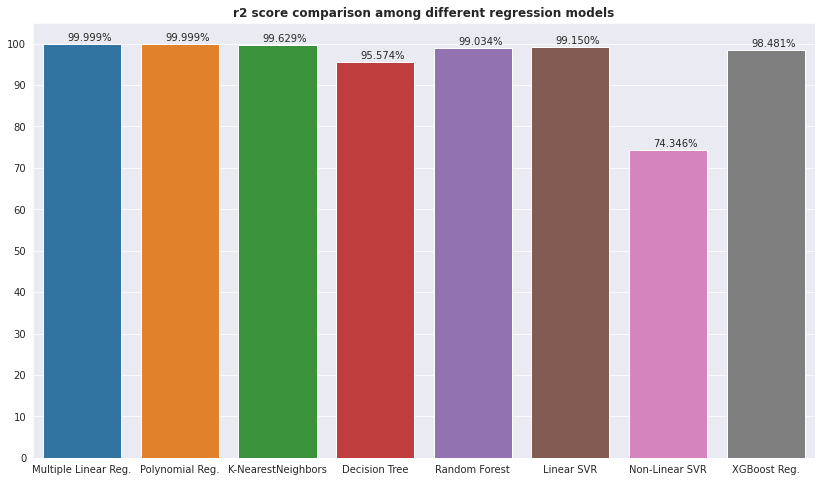

In [39]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()